<a href="https://colab.research.google.com/github/Farivini/AE-Gemini/blob/main/Analises_Fretes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [7]:
df = pd.read_csv('frete_dias_entrega.csv',sep=";")

In [8]:
df.head(5)

,Região,Valor do Frete,Dias para Entrega
0,Norte,49.59,20.0
1,Norte,117.57,3.0
2,Norte,98.15,7.0
3,Norte,96.98,6.0
4,Norte,123.00,6.0


In [10]:
# prompt: Usando o DataFrame df: média da coluna Valor do Frete para Região Nordeste

# Calculate the mean of the 'Valor do Frete' column for the 'Nordeste' region
mean_freight_northeast = df[df['Região'] == 'Nordeste']['Valor do Frete'].mean()

# Print the result
print(mean_freight_northeast)


91.488


In [13]:
df.isna().sum()

,0
Região,0
Valor do Frete,0
Dias para Entrega,0


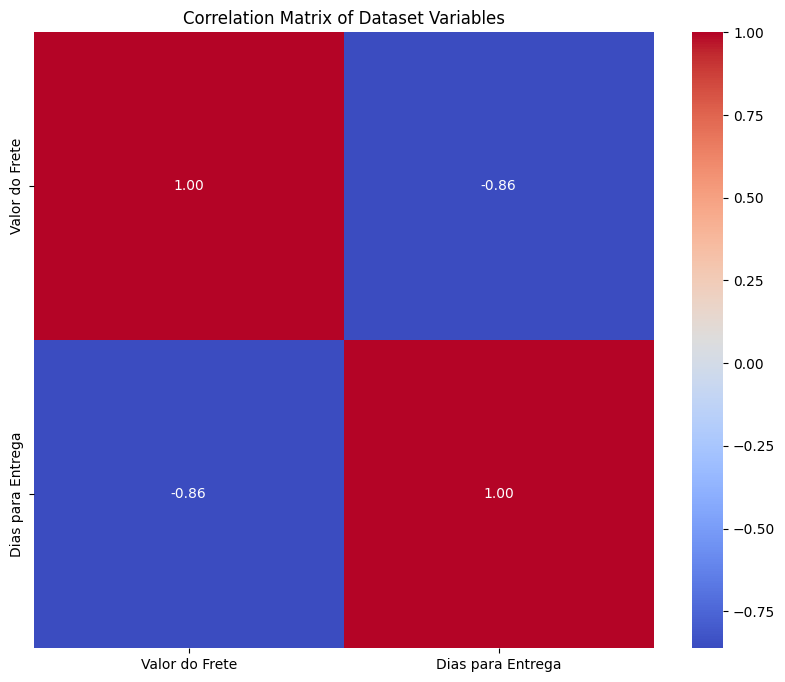

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate the correlation matrix, only including numerical features
# by specifying numeric_only=True
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Dataset Variables')
plt.show()

91.488


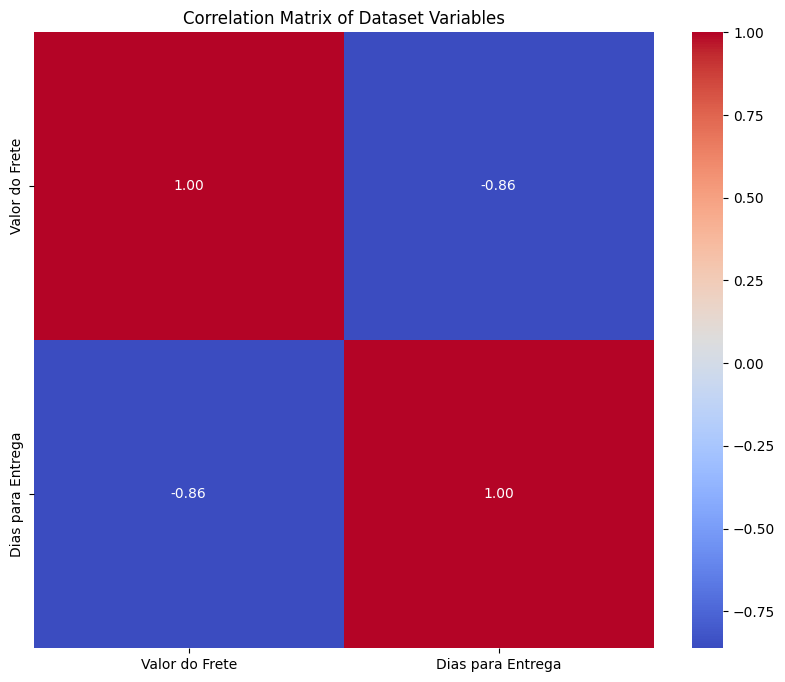

Coeficiente angular (slope): -3.4367322941009
Intercepto (intercept): 116.55187299328597
Coeficiente de correlação (r_value): -0.8616173274213924
p-value: 8.903310951939842e-149
Erro padrão (std_err): 0.09071992270763508


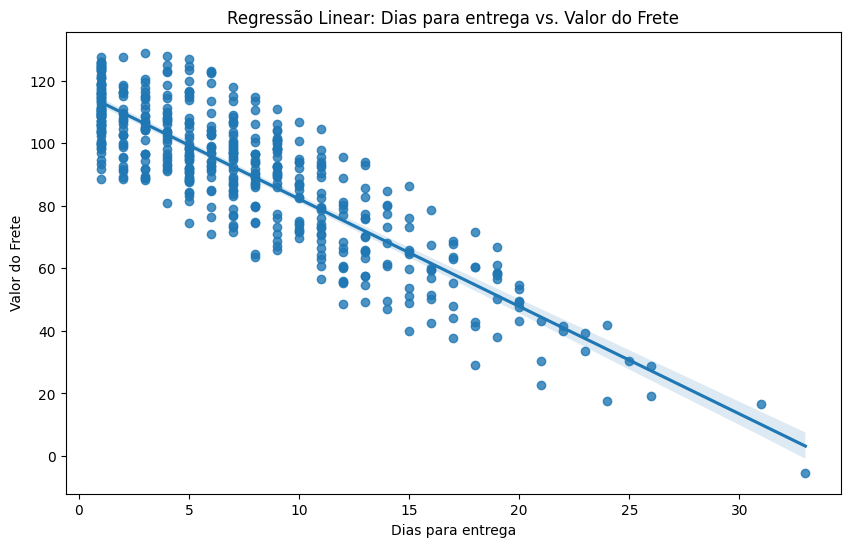

In [35]:
# prompt: Qual é o valor do coeficiente angular? com a linha da regressão

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('frete_dias_entrega.csv', sep=";")

# Calculate the mean of the 'Valor do Frete' column for the 'Nordeste' region
mean_freight_northeast = df[df['Região'] == 'Nordeste']['Valor do Frete'].mean()

# Print the result
print(mean_freight_northeast)

df.isna().sum()

# Calculate the correlation matrix, only including numerical features
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Dataset Variables')
plt.show()

# Calculate the linear regression
# Assuming 'Dias para entrega' is the independent variable (x)
# and 'Valor do Frete' is the dependent variable (y)
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(df['Dias para Entrega'], df['Valor do Frete'])

print(f"Coeficiente angular (slope): {slope}")
print(f"Intercepto (intercept): {intercept}")
print(f"Coeficiente de correlação (r_value): {r_value}")
print(f"p-value: {p_value}")
print(f"Erro padrão (std_err): {std_err}")


# Plot the regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Dias para Entrega', y='Valor do Frete', data=df)
plt.title('Regressão Linear: Dias para entrega vs. Valor do Frete')
plt.xlabel('Dias para entrega')
plt.ylabel('Valor do Frete')
plt.show()

In [31]:
# prompt: Qual valor do coeficiente angular para regiao nordeste?

import pandas as pd
import numpy as np

df = pd.read_csv('frete_dias_entrega.csv', sep=";")

# Filter data for the Northeast region
northeast_data = df[df['Região'] == 'Nordeste']

# Calculate the linear regression coefficients
coefficients = np.polyfit(northeast_data['Valor do Frete'], northeast_data['Dias para Entrega'], 1)

# The slope (first element of coefficients) is the angular coefficient
angular_coefficient = coefficients[0]

print(f"O coeficiente angular para a região Nordeste é: {angular_coefficient}")

O coeficiente angular para a região Nordeste é: -0.21979593231206562


In [36]:
# prompt: Qual a previsão de entrega de um item caso o frete seja de R$ 118,00? Utilize a função de arredondamento (round) para geração do resultado.

import pandas as pd
import numpy as np

df = pd.read_csv('frete_dias_entrega.csv', sep=";")

# Filter data for the Northeast region
northeast_data = df[df['Região'] == 'Nordeste']

# Calculate the linear regression coefficients
coefficients = np.polyfit(northeast_data['Valor do Frete'], northeast_data['Dias para Entrega'], 1)

# The slope (first element of coefficients) is the angular coefficient
angular_coefficient = coefficients[0]

#Intercept
intercept = coefficients[1]

#Predict delivery time
frete = 118
predicted_delivery_days = angular_coefficient * frete + intercept

#Round the result
predicted_delivery_days = round(predicted_delivery_days)

print(f"A previsão de entrega para um frete de R$ {frete} é de {predicted_delivery_days} dias.")

A previsão de entrega para um frete de R$ 118 é de 2 dias.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


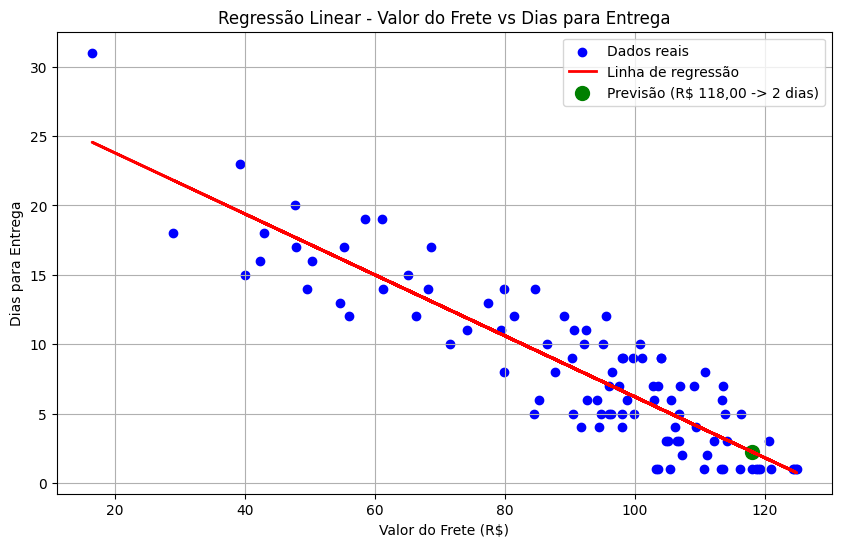

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
df= df[df['Região'] == 'Nordeste']
# Separando as variáveis independente (X) e dependente (y)
X = df[['Valor do Frete']]
y = df['Dias para Entrega']

# Criando o modelo de regressão linear
model = LinearRegression()
model.fit(X, y)

# Valor do frete para previsão
valor_frete = np.array([[118.00]])

# Prevendo os dias de entrega
dias_previsao = model.predict(valor_frete)
resultado = round(dias_previsao[0])

# Criando o gráfico
plt.figure(figsize=(10, 6))

# Plotando os pontos dos dados
plt.scatter(X, y, color='blue', label='Dados reais')

# Plotando a linha de regressão
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Linha de regressão')

# Marcando a previsão
plt.scatter(valor_frete, dias_previsao, color='green', s=100, label=f'Previsão (R$ 118,00 -> {resultado} dias)')

# Configurando o gráfico
plt.xlabel('Valor do Frete (R$)')
plt.ylabel('Dias para Entrega')
plt.title('Regressão Linear - Valor do Frete vs Dias para Entrega')
plt.legend()
plt.grid(True)

# Exibindo o gráfico
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


A previsão de entrega para um frete de R$ 52,98 é de aproximadamente 17 dias.


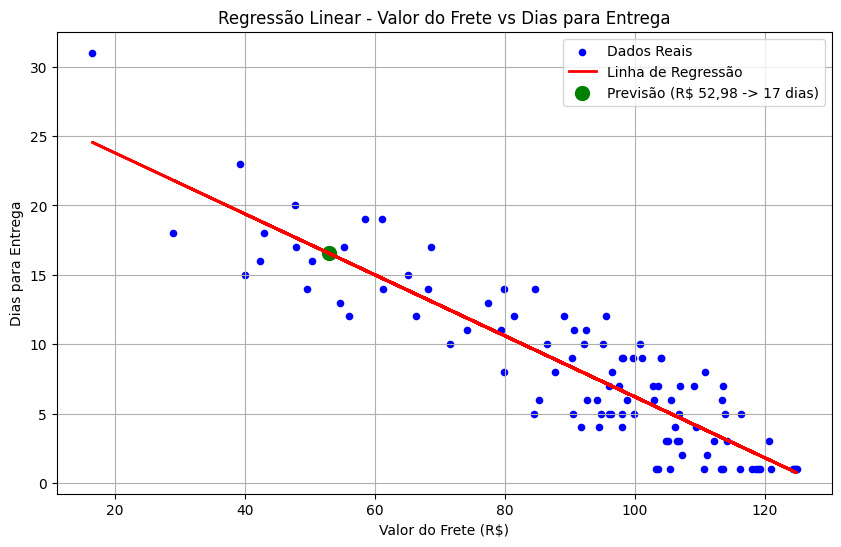

In [43]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
df = df[df['Região'] == 'Nordeste']

df = pd.DataFrame(df)

# Separando as variáveis independente (X) e dependente (y)
X = df[['Valor do Frete']]
y = df['Dias para Entrega']

# Criando o modelo de regressão linear
model = LinearRegression()
model.fit(X, y)

# Valor do frete para previsão
valor_frete = np.array([[52.98]])

# Prevendo os dias de entrega
dias_previsao = model.predict(valor_frete)

# Arredondando o resultado
resultado = round(dias_previsao[0])

# Exibindo o resultado
print(f'A previsão de entrega para um frete de R$ 52,98 é de aproximadamente {resultado} dias.')

# Gerando o gráfico para exemplificar
plt.figure(figsize=(10, 6))

# Plotando os dados reais
df.plot(kind='scatter', x='Valor do Frete', y='Dias para Entrega', color='blue', label='Dados Reais', ax=plt.gca())

# Plotando a linha de regressão
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Linha de Regressão')

# Marcando a previsão
plt.scatter(valor_frete, dias_previsao, color='green', s=100, label=f'Previsão (R$ 52,98 -> {resultado} dias)')

# Configurando o gráfico
plt.xlabel('Valor do Frete (R$)')
plt.ylabel('Dias para Entrega')
plt.title('Regressão Linear - Valor do Frete vs Dias para Entrega')
plt.legend()
plt.grid(True)

# Exibindo o gráfico
plt.show()


Mean Squared Error: 6.206248201326705
R² Score: 0.780134684214801
A previsão de entrega para um frete de R$ 52,98 é de aproximadamente 17 dias.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


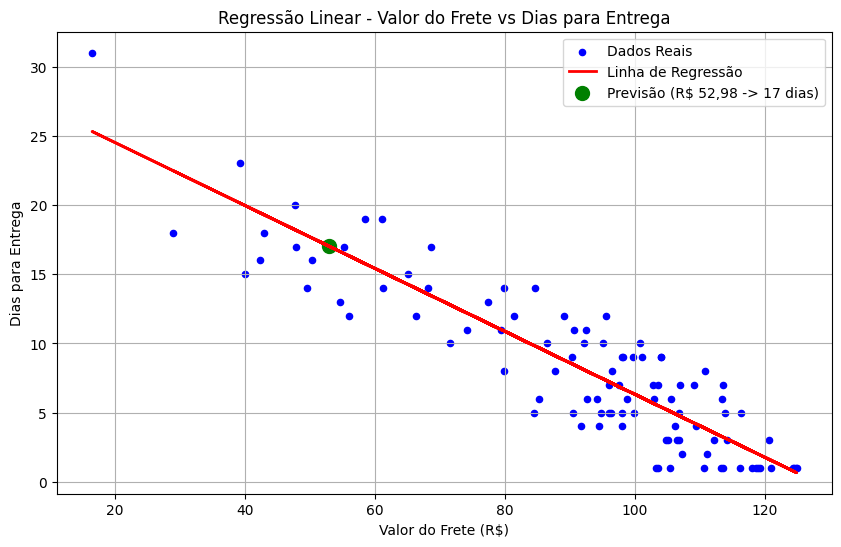

In [44]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



# Separando as variáveis independente (X) e dependente (y)
X = df[['Valor do Frete']]
y = df['Dias para Entrega']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo previsões com os dados de teste
y_pred = model.predict(X_test)

# Calculando métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Valor do frete para previsão
valor_frete = np.array([[52.98]])

# Prevendo os dias de entrega
dias_previsao = model.predict(valor_frete)

# Arredondando o resultado
resultado = round(dias_previsao[0])

# Exibindo o resultado
print(f'A previsão de entrega para um frete de R$ 52,98 é de aproximadamente {resultado} dias.')

# Gerando o gráfico para exemplificar
plt.figure(figsize=(10, 6))

# Plotando os dados reais
df.plot(kind='scatter', x='Valor do Frete', y='Dias para Entrega', color='blue', label='Dados Reais', ax=plt.gca())

# Plotando a linha de regressão
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Linha de Regressão')

# Marcando a previsão
plt.scatter(valor_frete, dias_previsao, color='green', s=100, label=f'Previsão (R$ 52,98 -> {resultado} dias)')

# Configurando o gráfico
plt.xlabel('Valor do Frete (R$)')
plt.ylabel('Dias para Entrega')
plt.title('Regressão Linear - Valor do Frete vs Dias para Entrega')
plt.legend()
plt.grid(True)

# Exibindo o gráfico
plt.show()
